# Graphing the US State Borders

We can think of the 50 states as composing a network, or a *graph* in the mathematical sense of a set of nodes and edges. The nodes will represent the states themselves, and the edges will represent states' borders.

We can then use the Python library `networkx` to explore some features of the "American network".

In [302]:
import pandas as pd
import networkx as nx

## Defining the Network

We'll start by defining the nodes in terms of the borders of the states they represent. The `networkx` library can build a network from a dictionary, where each key is the name of a node and the corresponding value is a dictionary whose keys are the linked nodes and whose values specify the distance between or "weight" of the links. For now we'll use a uniform weight of 0.01. In future work we'll try to include a more realistic representation of state distances.

In [303]:
# We'll make the choice not to count borders that exist only on water
# (e.g. Minnesota-Michigan) and not to count states that touch only at
# a point as bordering one another (e.g. Arizona-Colorado).

state_borders = {'AL': {'FL': {'weight': 0.01}, 'GA': {'weight': 0.01},
                        'MS': {'weight': 0.01}, 'TN': {'weight': 0.01}},
                'AK': {},
                'AZ': {'CA': {'weight': 0.01}, 'NV': {'weight': 0.01},
                       'NM': {'weight': 0.01}, 'UT': {'weight': 0.01}},
                'AR': {'LA': {'weight': 0.01}, 'MS': {'weight': 0.01},
                       'MO': {'weight': 0.01}, 'OK': {'weight': 0.01},
                       'TN': {'weight': 0.01}, 'TX': {'weight': 0.01}},
                'CA': {'AZ': {'weight': 0.01}, 'NV': {'weight': 0.01},
                       'OR': {'weight': 0.01}},
                'CO': {'KS': {'weight': 0.01}, 'NE': {'weight': 0.01},
                       'NM': {'weight': 0.01}, 'OK': {'weight': 0.01},
                       'UT': {'weight': 0.01}, 'WY': {'weight': 0.01}},
                'CT': {'MA': {'weight': 0.1}, 'NY': {'weight': 0.1},
                       'RI': {'weight': 0.1}},
                'DE': {'MD': {'weight': 0.1}, 'NJ': {'weight': 0.1},
                       'PA': {'weight': 0.1}},
                'FL': {'AL': {'weight': 0.01}, 'GA': {'weight': 0.01}},
                'GA': {'AL': {'weight': 0.01}, 'FL': {'weight': 0.01},
                       'NC': {'weight': 0.01}, 'SC': {'weight': 0.01},
                       'TN': {'weight': 0.01}},
                'HI': {},
                'ID': {'MT': {'weight': 0.01}, 'NV': {'weight': 0.01},
                       'OR': {'weight': 0.01}, 'UT': {'weight': 0.01},
                       'WA': {'weight': 0.01}, 'WY': {'weight': 0.01}},
                'IL': {'IN': {'weight': 0.01}, 'IA': {'weight': 0.01},
                       'KY': {'weight': 0.01}, 'MO': {'weight': 0.01},
                       'WI': {'weight': 0.01}},
                'IN': {'IL': {'weight': 0.01}, 'KY': {'weight': 0.01},
                       'MI': {'weight': 0.01}, 'OH': {'weight': 0.01}},
                'IA': {'IL': {'weight': 0.01}, 'MN': {'weight': 0.01},
                       'MO': {'weight': 0.01}, 'NE': {'weight': 0.01},
                       'SD': {'weight': 0.01}, 'WI': {'weight': 0.01}},
                'KS': {'CO': {'weight': 0.01}, 'MO': {'weight': 0.01},
                       'NE': {'weight': 0.01}, 'OK': {'weight': 0.01}},
                'KY': {'IL': {'weight': 0.01}, 'IN': {'weight': 0.01},
                       'MO': {'weight': 0.01}, 'OH': {'weight': 0.01},
                       'TN': {'weight': 0.01}, 'VA': {'weight': 0.01},
                       'WV': {'weight': 0.01}},
                'LA': {'AR': {'weight': 0.01}, 'MS': {'weight': 0.01},
                       'TX': {'weight': 0.01}},
                'ME': {'NH': {'weight': 0.1}},
                'MD': {'DE': {'weight': 0.1}, 'PA': {'weight': 0.01},
                       'VA': {'weight': 0.01}, 'WV': {'weight': 0.01}},
                'MA': {'CT': {'weight': 0.1}, 'NH': {'weight': 0.1},
                       'NY': {'weight': 0.1}, 'RI': {'weight': 0.1},
                       'VT': {'weight': 0.1}},
                'MI': {'IN': {'weight': 0.01}, 'OH': {'weight': 0.01},
                       'WI': {'weight': 0.01}},
                'MN': {'IA': {'weight': 0.01}, 'ND': {'weight': 0.01},
                       'SD': {'weight': 0.01}, 'WI': {'weight': 0.01}},
                'MS': {'AL': {'weight': 0.01}, 'AR': {'weight': 0.01},
                       'LA': {'weight': 0.01}, 'TN': {'weight': 0.01}},
                'MO': {'AR': {'weight': 0.01}, 'IL': {'weight': 0.01},
                       'IA': {'weight': 0.01}, 'KS': {'weight': 0.01},
                       'KY': {'weight': 0.01}, 'NE': {'weight': 0.01},
                       'OK': {'weight': 0.01}, 'TN': {'weight': 0.01}},
                'MT': {'ID': {'weight': 0.01}, 'ND': {'weight': 0.01},
                       'SD': {'weight': 0.01}, 'WY': {'weight': 0.01}},
                'NE': {'CO': {'weight': 0.01}, 'IA': {'weight': 0.01},
                       'KS': {'weight': 0.01}, 'MO': {'weight': 0.01},
                       'SD': {'weight': 0.01}, 'WY': {'weight': 0.01}},
                'NV': {'AZ': {'weight': 0.01}, 'CA': {'weight': 0.01},
                       'ID': {'weight': 0.01}, 'OR': {'weight': 0.01},
                       'UT': {'weight': 0.01}},
                'NH': {'ME': {'weight': 0.1}, 'MA': {'weight': 0.1},
                       'VT': {'weight': 0.1}},
                'NJ': {'DE': {'weight': 0.1}, 'NY': {'weight': 0.1},
                       'PA': {'weight': 0.1}},
                'NM': {'AZ': {'weight': 0.01}, 'CO': {'weight': 0.01},
                       'OK': {'weight': 0.01}, 'TX': {'weight': 0.01}},
                'NY': {'CT': {'weight': 0.1}, 'MA': {'weight': 0.1},
                       'NJ': {'weight': 0.1}, 'PA': {'weight': 0.01},
                       'VT': {'weight': 0.1}},
                'NC': {'GA': {'weight': 0.01}, 'SC': {'weight': 0.01},
                       'TN': {'weight': 0.01}, 'VA': {'weight': 0.01}},
                'ND': {'MN': {'weight': 0.01}, 'MT': {'weight': 0.01},
                       'SD': {'weight': 0.01}},
                'OH': {'IN': {'weight': 0.01}, 'KY': {'weight': 0.01},
                       'MI': {'weight': 0.01}, 'PA': {'weight': 0.01},
                       'WV': {'weight': 0.01}},
                'OK': {'AR': {'weight': 0.01}, 'CO': {'weight': 0.01},
                       'KS': {'weight': 0.01}, 'MO': {'weight': 0.01},
                       'NM': {'weight': 0.01}, 'TX': {'weight': 0.01}},
                'OR': {'CA': {'weight': 0.01}, 'ID': {'weight': 0.01},
                       'NV': {'weight': 0.01}, 'WA': {'weight': 0.01}},
                'PA': {'DE': {'weight': 0.1}, 'MD': {'weight': 0.01},
                       'NJ': {'weight': 0.01}, 'NY': {'weight': 0.01},
                       'OH': {'weight': 0.01}, 'WV': {'weight': 0.01}},
                'RI': {'CT': {'weight': 0.1}, 'MA': {'weight': 0.1}},
                'SC': {'GA': {'weight': 0.01}, 'NC': {'weight': 0.01}},
                'SD': {'IA': {'weight': 0.01}, 'MN': {'weight': 0.01},
                       'MT': {'weight': 0.01}, 'NE': {'weight': 0.01},
                       'ND': {'weight': 0.01}, 'WY': {'weight': 0.01}},
                'TN': {'AL': {'weight': 0.01}, 'AR': {'weight': 0.01},
                       'GA': {'weight': 0.01}, 'KY': {'weight': 0.01},
                       'MS': {'weight': 0.01}, 'MO': {'weight': 0.01},
                       'NC': {'weight': 0.01}, 'VA': {'weight': 0.01}},
                'TX': {'AR': {'weight': 0.01}, 'LA': {'weight': 0.01},
                       'NM': {'weight': 0.01}, 'OK': {'weight': 0.01}},
                'UT': {'AZ': {'weight': 0.01}, 'CO': {'weight': 0.01},
                       'ID': {'weight': 0.01}, 'NV': {'weight': 0.01},
                       'WY': {'weight': 0.01}},
                'VT': {'MA': {'weight': 0.1}, 'NH': {'weight': 0.1},
                       'NY': {'weight': 0.1}},
                'VA': {'KY': {'weight': 0.01}, 'MD': {'weight': 0.01},
                       'NC': {'weight': 0.01}, 'TN': {'weight': 0.01},
                       'WV': {'weight': 0.01}},
                'WA': {'ID': {'weight': 0.01}, 'OR': {'weight': 0.01}},
                'WV': {'KY': {'weight': 0.01}, 'MD': {'weight': 0.01},
                       'OH': {'weight': 0.01}, 'PA': {'weight': 0.01},
                       'VA': {'weight': 0.01}},
                'WI': {'IL': {'weight': 0.01}, 'IA': {'weight': 0.01},
                       'MI': {'weight': 0.01}, 'MN': {'weight': 0.01}},
                'WY': {'CO': {'weight': 0.01}, 'ID': {'weight': 0.01}, 
                       'MT': {'weight': 0.01}, 'NE': {'weight': 0.01},
                       'SD': {'weight': 0.01}, 'UT': {'weight': 0.01}}}

Now just use the `from_dict_of_dicts()` function:

In [305]:
borders = nx.from_dict_of_dicts(state_borders)

## Visualizing our Network

We can use `networkx` to show us the networks we've built.

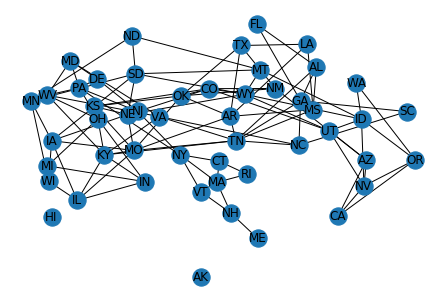

In [306]:
# Since we haven't specified node positions, this code
# will return variable results.

nx.draw(borders, with_labels=True)

## Reducing to Lower 48 and Redrawing

Alaska and Hawaii of course have no borders with other states and so we'll eliminate them. We'll also add a dictionary of positions so that we can place our nodes in a way that actually resembles the map.

In [307]:
list(nx.isolates(borders))

['AK', 'HI']

In [308]:
state_borders48 = {}
for state in state_borders:
    if state_borders[state] != {}:
        state_borders48[state] = state_borders[state]

In [309]:
borders48 = nx.from_dict_of_dicts(state_borders48)

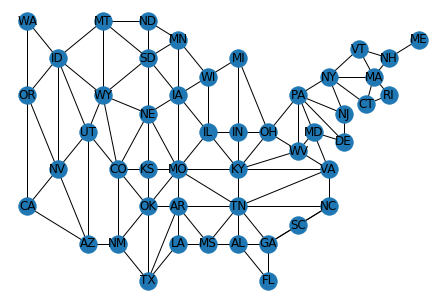

In [310]:
nx.draw(borders48, with_labels=True,
       pos={'AL': (8, 0), 'AZ': (3, 0), 'AR': (6, 1), 'CA': (1, 1),
           'CO': (4, 2), 'CT': (12.25, 3.75), 'DE': (11.5, 2.75), 'FL': (9, -1),
           'GA': (9, 0), 'ID': (2, 5), 'IL': (7, 3), 'IN': (8, 3),
           'IA': (6, 4), 'KS': (5, 2), 'KY': (8, 2), 'LA': (6, 0),
           'ME': (14, 5.5), 'MD': (10.5, 3), 'MA': (12.5, 4.5), 'MI': (8, 5),
           'MN': (6, 5.5), 'MS': (7, 0), 'MO': (6, 2), 'MT': (3.5, 6),
           'NE': (5, 3.5), 'NV': (2, 2), 'NH': (13, 5), 'NJ': (11.5, 3.5),
           'NM': (4, 0), 'NY': (11, 4.5), 'NC': (11, 1), 'ND': (5, 6),
           'OH': (9, 3), 'OK': (5, 1), 'OR': (1, 4), 'PA': (10, 4),
           'RI': (13, 4), 'SC': (10, 0.5), 'SD': (5, 5), 'TN': (8, 1),
           'TX': (5, -1), 'UT': (3, 3), 'VT': (12, 5.25), 'VA': (11, 2),
           'WA': (1, 6), 'WV': (10, 2.5), 'WI': (7, 4.5), 'WY': (3.5, 4)})

## Exploring

### Shortest Paths

One feature of the state borders that we can explore is how to get from one state to another. A Dijkstra Path tells us the shortest path from one node to another. Since we've used a uniform weight (for now), we can simply measure a path from State A to State B in terms of the number of states between A and B.

In [311]:
list(nx.all_pairs_dijkstra_path(borders))

[('AL',
  {'AL': ['AL'],
   'FL': ['AL', 'FL'],
   'GA': ['AL', 'GA'],
   'MS': ['AL', 'MS'],
   'TN': ['AL', 'TN'],
   'NC': ['AL', 'GA', 'NC'],
   'SC': ['AL', 'GA', 'SC'],
   'AR': ['AL', 'MS', 'AR'],
   'LA': ['AL', 'MS', 'LA'],
   'KY': ['AL', 'TN', 'KY'],
   'MO': ['AL', 'TN', 'MO'],
   'VA': ['AL', 'TN', 'VA'],
   'OK': ['AL', 'MS', 'AR', 'OK'],
   'TX': ['AL', 'MS', 'AR', 'TX'],
   'IL': ['AL', 'TN', 'KY', 'IL'],
   'IN': ['AL', 'TN', 'KY', 'IN'],
   'OH': ['AL', 'TN', 'KY', 'OH'],
   'WV': ['AL', 'TN', 'KY', 'WV'],
   'IA': ['AL', 'TN', 'MO', 'IA'],
   'KS': ['AL', 'TN', 'MO', 'KS'],
   'NE': ['AL', 'TN', 'MO', 'NE'],
   'MD': ['AL', 'TN', 'VA', 'MD'],
   'CO': ['AL', 'MS', 'AR', 'OK', 'CO'],
   'NM': ['AL', 'MS', 'AR', 'OK', 'NM'],
   'WI': ['AL', 'TN', 'KY', 'IL', 'WI'],
   'MI': ['AL', 'TN', 'KY', 'IN', 'MI'],
   'PA': ['AL', 'TN', 'KY', 'OH', 'PA'],
   'MN': ['AL', 'TN', 'MO', 'IA', 'MN'],
   'SD': ['AL', 'TN', 'MO', 'IA', 'SD'],
   'WY': ['AL', 'TN', 'MO', 'NE', 'WY'],
  

### How Many Borders Per State?

This code will tell us how many states we have for each number of borders

In [313]:
nx.degree_histogram(borders)

[2, 1, 4, 9, 13, 9, 9, 1, 2]

That is: Two states have zero borders (AK and HI), one state has only one border (ME), etc. There are two states with eight borders each: MO and TN.

#### Average Neighbor Degree

The degree of a node is the number of edges it has, so the average neighbor degree for a state A tells us the average number of states bordered by the states that border A.

In [318]:
sorted(nx.average_neighbor_degree(borders48).items(),
       key=lambda x: x[1],
       reverse=True)[:10]

[('KS', 6.5),
 ('MO', 6.0),
 ('NE', 6.0),
 ('IL', 5.8),
 ('KY', 5.714285714285714),
 ('VA', 5.6),
 ('AR', 5.5),
 ('IA', 5.5),
 ('WY', 5.5),
 ('UT', 5.4)]

Kansas borders Colorado, Missouri, Nebraska, and Oklahoma. Three of these states have six neighbors and the fourth has eight!

#### Average degree connectivity

Group states by how many borders they have. The average degree connectivity tells us, for a given group thus defined, the average number of borders for the states that *border* the states in the group.

In [314]:
nx.average_degree_connectivity(borders48)

{4: 4.903846153846154,
 6: 5.148148148148148,
 3: 4.2592592592592595,
 2: 4.5,
 5: 4.7555555555555555,
 7: 5.714285714285714,
 1: 3.0,
 8: 5.6875}

Maine, for example, is the only state with just a single border, so it constitutes its own border group. And the only state that borders it is New Hampshire, which itself has three borders. (It borders Vermont and Massachusetts as well as Maine.) So the averge degree connectivity for the 1-border group (= {Maine}) is 3.

Let's think about the 2-border group. This group contains 4 states: Florida, Rhode Island, South Carolina, and Washington. The states that border these four are: Alabama and Georgia (FL), Connecticut and Massachusetts (RI), Georgia (again!) and North Carolina (SC), and Idaho and Oregon (WA). These bordering states have border counts of 4, 5, 3, 5, 5, 4, 6, and 4, and the average of these seven numbers is 36 / 8 = 4.5.

### Most Central State

There are a few ways of calculating the "middle" of a graph.

#### Betweenness Centrality

To calculate the betweenness centrality of a state A: Pick two states different from A and consider all of the shortest paths between them. Calculate, as a percentage, how many of these shortest paths include A. Repeat for all pairs of states different from A and take an average.

In [386]:
# Which state has the highest betweenness centrality?

sorted(nx.betweenness_centrality(borders48).items(),
       key=lambda x: x[1], reverse=True)[:10]

[('MO', 0.35891442260482853),
 ('PA', 0.296461795434578),
 ('KY', 0.28540785133974644),
 ('NY', 0.22802960222016652),
 ('TN', 0.22007277005437514),
 ('OH', 0.1626540185201946),
 ('NE', 0.1605104596296623),
 ('WV', 0.13474086562132587),
 ('WY', 0.12670681678142565),
 ('OK', 0.1120098979347662)]

On this metric of centrality, given our uniform weighting, Missouri is the most central state.

##### Edge Betweenness
This betweenness centrality can also be used on the *edges*. Just as the idea of a state with a high betweenness centrality means that many shortest paths go through it, so the idea of a *border* with a high betweenness centrality means that many shortest paths *include it as a part*.

Let's measure this too:

In [292]:
sorted(nx.betweenness.edge_betweenness_centrality(borders48).items(),
       key=lambda x: x[1], reverse=True)[:10]

[(('NY', 'PA'), 0.2451241134751773),
 (('KY', 'MO'), 0.21030961250104066),
 (('OH', 'PA'), 0.15619438342908917),
 (('MO', 'NE'), 0.1551709075433534),
 (('PA', 'WV'), 0.12481075550120756),
 (('KY', 'WV'), 0.12285563474498692),
 (('KY', 'OH'), 0.11933026770688997),
 (('NE', 'WY'), 0.11443657414980264),
 (('MO', 'TN'), 0.10630127165376729),
 (('MO', 'OK'), 0.09827627099106054)]

New York is the only "bridge" between New England and the rest of the country! And if you're coming from New England and going west, the two other (non-New England) states bordering New York are New Jersey and Pennsylvania. And of those two, Pennsylvania is bound to be more "on the way" to your ultimate destination than is New Jersey.

#### Degree Centrality

Degree centrality of a state A is simply the ratio of the number of borders A has to the total number of states less 1, i.e. the ratio of the number of borders a has to the total number of borders it *could* have.

In [321]:
# Which state has the highest degree centrality?

sorted(nx.degree_centrality(borders48).items(),
      key=lambda x: x[1], reverse=True)[:10]

[('MO', 0.1702127659574468),
 ('TN', 0.1702127659574468),
 ('KY', 0.14893617021276595),
 ('AR', 0.1276595744680851),
 ('CO', 0.1276595744680851),
 ('ID', 0.1276595744680851),
 ('IA', 0.1276595744680851),
 ('NE', 0.1276595744680851),
 ('OK', 0.1276595744680851),
 ('PA', 0.1276595744680851)]

This one we really knew already. Missouri and Tennessee both have eight borders.

#### Closeness Centrality

To calculate the closeness centrality of a state A, calculate the shortest path from A to every other state. Add those all together and then take the reciprocal (so that higher numbers will correspond to states with shorter shortest paths to other states).

In [322]:
# Which state has the highest closeness centrality?

sorted(nx.closeness_centrality(borders48).items(),
      key=lambda x: x[1], reverse=True)[:10]

[('MO', 0.3560606060606061),
 ('KY', 0.34306569343065696),
 ('TN', 0.32867132867132864),
 ('NE', 0.31333333333333335),
 ('IL', 0.3092105263157895),
 ('OH', 0.3032258064516129),
 ('OK', 0.3032258064516129),
 ('AR', 0.30128205128205127),
 ('IA', 0.30128205128205127),
 ('WV', 0.30128205128205127)]

Missouri again! I think at this point it's fair to say that we have a winner.

## New Network

### Distances

Let's now try to add in weights into our graph so that we're better capturing the distances between states.

The distances used below are the shortest driving distances between states' [geographic centers](https://en.wikipedia.org/wiki/List_of_geographic_centers_of_the_United_States), as reported by Google Maps.

In [377]:
dists = {'ALFL': 476, 'ALGA': 225, 'ALMS': 202, 'ALTN': 247,
         'AZCA': 669, 'AZNV': 616, 'AZNM': 424, 'AZUT': 449,
         'ARLA': 290, 'ARMS': 272, 'ARMO': 341, 'AROK': 336,
         'ARTN': 375, 'ARTX': 538, 'CANV': 339, 'CAOR': 658,
         'COKS': 356, 'CONE': 393, 'CONM': 369, 'COOK': 568,
         'COUT': 525, 'COWY': 419, 'CTMA': 77, 'CTNY': 211,
         'CTRI': 78, 'DEMD': 76, 'DENJ': 112, 'DEPA': 214,
         'FLGA': 342, 'GANC': 358, 'GASC': 197, 'GATN': 300,
         'IDMT': 451, 'IDNV': 513, 'IDOR': 465, 'IDUT': 447,
         'IDWA': 563, 'IDWY': 396, 'ILIN': 172, 'ILIA': 356,
         'ILKY': 371, 'ILMO': 199, 'ILWI': 404, 'INKY': 208,
         'INMI': 355, 'INOH': 190, 'IAMN': 341, 'IAMO': 291,
         'IANE': 374, 'IASD': 483, 'IAWI': 328, 'KSMO': 384,
         'KSNE': 245, 'KSOK': 270, 'KYMO': 473, 'KYOH': 224,
         'KYTN': 195, 'KYVA': 446, 'KYWV': 274, 'LAMS': 229,
         'LATX': 491, 'MENH': 204, 'MDPA': 199, 'MDVA': 183,
         'MDWV': 306, 'MANH': 130, 'MANY': 227, 'MARI': 64,
         'MAVT': 159, 'MIOH': 377, 'MIWI': 280, 'MNND': 345,
         'MNSD': 415, 'MNWI': 292, 'MSTN': 324, 'MONE': 517,
         'MOOK': 419, 'MOTN': 468, 'MTND': 495, 'MTSD': 582,
         'MTWY': 398, 'NESD': 259, 'NEWY': 555, 'NVOR': 497,
         'NVUT': 391, 'NHVT': 84, 'NJNY': 285, 'NJPA': 211,
         'NMOK': 518, 'NMTX': 527, 'NYPA': 263, 'NYVT': 190,
         'NCSC': 167, 'NCTN': 518, 'NCVA': 183, 'NDSD': 240,
         'OHPA': 323, 'OHWV': 224, 'OKTX': 354, 'ORWA': 317,
         'PAWV': 267, 'SDWY': 553, 'TNVA': 529, 'UTWY': 377,
         'VAWV': 223}

The above are all of our distances, but we need to duplicate them. Since distances are symmetric (the distance between New York and Pennsylvania is the same as the distance between Pennsylvania and New York), we can use the following trick:

In [378]:
tot_dists = dists.copy()
for key in dists.keys():
    tot_dists[key] = dists[key]
    tot_dists[key[2:]+key[:2]] = dists[key]

Now we'll build the new graph with these new weights.

In [380]:
new_map = state_borders48.copy()

In [381]:
for state in state_borders48.keys():
    new_map[state] = {key[2:]: {'weight': tot_dists[key]}\
                      for key in tot_dists if key[:2] == state}

Let's make sure that worked!

In [382]:
new_map['WY']

{'CO': {'weight': 419},
 'ID': {'weight': 396},
 'MT': {'weight': 398},
 'NE': {'weight': 555},
 'SD': {'weight': 553},
 'UT': {'weight': 377}}

In [383]:
new_borders = nx.from_dict_of_dicts(new_map)

In [384]:
list(nx.all_pairs_dijkstra_path(new_borders))

[('AL',
  {'AL': ['AL'],
   'FL': ['AL', 'FL'],
   'GA': ['AL', 'GA'],
   'MS': ['AL', 'MS'],
   'TN': ['AL', 'TN'],
   'AR': ['AL', 'MS', 'AR'],
   'LA': ['AL', 'MS', 'LA'],
   'NC': ['AL', 'GA', 'NC'],
   'SC': ['AL', 'GA', 'SC'],
   'KY': ['AL', 'TN', 'KY'],
   'MO': ['AL', 'TN', 'MO'],
   'VA': ['AL', 'GA', 'NC', 'VA'],
   'TX': ['AL', 'MS', 'LA', 'TX'],
   'IL': ['AL', 'TN', 'KY', 'IL'],
   'IN': ['AL', 'TN', 'KY', 'IN'],
   'OH': ['AL', 'TN', 'KY', 'OH'],
   'WV': ['AL', 'TN', 'KY', 'WV'],
   'OK': ['AL', 'MS', 'AR', 'OK'],
   'MI': ['AL', 'TN', 'KY', 'IN', 'MI'],
   'PA': ['AL', 'TN', 'KY', 'WV', 'PA'],
   'IA': ['AL', 'TN', 'MO', 'IA'],
   'KS': ['AL', 'MS', 'AR', 'OK', 'KS'],
   'NE': ['AL', 'TN', 'MO', 'NE'],
   'MD': ['AL', 'GA', 'NC', 'VA', 'MD'],
   'CO': ['AL', 'MS', 'AR', 'OK', 'CO'],
   'NM': ['AL', 'MS', 'AR', 'OK', 'NM'],
   'WI': ['AL', 'TN', 'KY', 'IL', 'WI'],
   'DE': ['AL', 'GA', 'NC', 'VA', 'MD', 'DE'],
   'NJ': ['AL', 'GA', 'NC', 'VA', 'MD', 'DE', 'NJ'],
   'NY'

We won't see any changes in centrality metrics:

In [385]:
sorted(nx.betweenness_centrality(new_borders).items(),
       key=lambda x: x[1], reverse=True)[:10]

[('MO', 0.35891442260482853),
 ('PA', 0.296461795434578),
 ('KY', 0.28540785133974644),
 ('NY', 0.22802960222016652),
 ('TN', 0.22007277005437514),
 ('OH', 0.1626540185201946),
 ('NE', 0.1605104596296623),
 ('WV', 0.13474086562132587),
 ('WY', 0.12670681678142565),
 ('OK', 0.1120098979347662)]

In [388]:
sorted(nx.degree_centrality(new_borders).items(),
      key=lambda x: x[1], reverse=True)[:10]

[('MO', 0.1702127659574468),
 ('TN', 0.1702127659574468),
 ('KY', 0.14893617021276595),
 ('AR', 0.1276595744680851),
 ('CO', 0.1276595744680851),
 ('ID', 0.1276595744680851),
 ('IA', 0.1276595744680851),
 ('NE', 0.1276595744680851),
 ('OK', 0.1276595744680851),
 ('PA', 0.1276595744680851)]

In [389]:
sorted(nx.closeness_centrality(new_borders).items(),
      key=lambda x: x[1], reverse=True)[:10]

[('MO', 0.3560606060606061),
 ('KY', 0.34306569343065696),
 ('TN', 0.32867132867132864),
 ('NE', 0.31333333333333335),
 ('IL', 0.3092105263157895),
 ('OH', 0.3032258064516129),
 ('OK', 0.3032258064516129),
 ('AR', 0.30128205128205127),
 ('IA', 0.30128205128205127),
 ('WV', 0.30128205128205127)]

## Other Metrics of Centrality

The library `networkx` has many other measures of centrality. Many of these are related to metrics we've already examined. Let's just take a peek to see if we find nodes other than Missouri or edges other than New York - Pennsylvania.

In [337]:
# Communicability Betweenness

sorted(nx.centrality.communicability_betweenness_centrality(new_borders).items(),
      key=lambda x: x[1], reverse=True)[:10]

[('MO', 0.42664656101363224),
 ('KY', 0.3695668299370644),
 ('PA', 0.31728062772495563),
 ('TN', 0.3156013368905426),
 ('NY', 0.23960729179786133),
 ('NE', 0.2161526211006525),
 ('WV', 0.21064930685850905),
 ('OH', 0.1974651973978765),
 ('IA', 0.17696701438324675),
 ('VA', 0.1742129896190966)]

In [338]:
# Current Flow Betweenness

sorted(nx.centrality.current_flow_betweenness_centrality(new_borders).items(),
      key=lambda x: x[1], reverse=True)[:10]

[('MO', 0.2906905219449308),
 ('PA', 0.28891316177043247),
 ('TN', 0.2863970593114364),
 ('KY', 0.2671263912229202),
 ('NY', 0.24317366666874812),
 ('VA', 0.2208793258242315),
 ('OH', 0.2067253102562073),
 ('WV', 0.18793080760938363),
 ('IA', 0.17316067085934594),
 ('AR', 0.17087383793103886)]

In [339]:
# Current Flow Closeness

sorted(nx.centrality.current_flow_closeness_centrality(new_borders).items(),
      key=lambda x: x[1], reverse=True)[:10]

[('MO', 0.024725864851083607),
 ('KY', 0.023996579602244498),
 ('TN', 0.02348278714799428),
 ('IA', 0.02218293423434648),
 ('NE', 0.02213569402132042),
 ('IL', 0.021979390422356065),
 ('OK', 0.02190325091158687),
 ('AR', 0.02186828796034588),
 ('VA', 0.021674331244833867),
 ('CO', 0.021462990157504004)]

In [340]:
# Edge Current Flow Betweenness

sorted(nx.centrality.edge_current_flow_betweenness_centrality(new_borders).items(),
      key=lambda x: x[1], reverse=True)[:10]

[(('NY', 'PA'), 0.08524728380346552),
 (('PA', 'OH'), 0.07572091159293884),
 (('MD', 'VA'), 0.06269379420759656),
 (('NY', 'NJ'), 0.06006245216138953),
 (('KY', 'MO'), 0.05617537735665301),
 (('PA', 'WV'), 0.05557045289043807),
 (('MI', 'WI'), 0.05348262971119133),
 (('NC', 'VA'), 0.05273134924325274),
 (('NM', 'AZ'), 0.05137557134315054),
 (('VA', 'TN'), 0.05129951437127516)]

In [341]:
# Edge Load

sorted(nx.centrality.edge_load_centrality(new_borders).items(),
      key=lambda x: x[1], reverse=True)[:10]

[(('NY', 'PA'), 777.0),
 (('PA', 'NY'), 777.0),
 (('KY', 'MO'), 707.4166666666669),
 (('MO', 'KY'), 707.4166666666669),
 (('MO', 'NE'), 534.8055555555554),
 (('NE', 'MO'), 534.8055555555554),
 (('OH', 'PA'), 517.1203703703703),
 (('PA', 'OH'), 517.1203703703703),
 (('KY', 'WV'), 416.22453703703707),
 (('WV', 'KY'), 416.22453703703707)]

In [344]:
# Eigenvector

sorted(nx.centrality.eigenvector_centrality(new_borders).items(),
      key=lambda x: x[1], reverse=True)[:10]

[('MO', 0.36447629273414844),
 ('TN', 0.2818304958648028),
 ('KY', 0.2660436648825316),
 ('NE', 0.26198783127501035),
 ('OK', 0.23900077651222065),
 ('IA', 0.23703611429271834),
 ('AR', 0.23460966267445735),
 ('CO', 0.21357484035093954),
 ('IL', 0.21000327972900645),
 ('KS', 0.20336573666666366)]

In [348]:
# Harmonic

sorted(nx.centrality.harmonic_centrality(new_borders).items(),
      key=lambda x: x[1], reverse=True)[:10]

[('MO', 22.159523809523797),
 ('TN', 21.12619047619047),
 ('KY', 20.866666666666664),
 ('NE', 19.76071428571429),
 ('AR', 19.210714285714293),
 ('IA', 19.210714285714293),
 ('OK', 19.17738095238096),
 ('IL', 18.709523809523816),
 ('WY', 18.423015873015874),
 ('VA', 18.400000000000006)]

In [352]:
# Information

sorted(nx.centrality.information_centrality(new_borders).items(),
      key=lambda x: x[1], reverse=True)[:10]

[('MO', 0.024725864851083607),
 ('KY', 0.023996579602244498),
 ('TN', 0.02348278714799428),
 ('IA', 0.02218293423434648),
 ('NE', 0.02213569402132042),
 ('IL', 0.021979390422356065),
 ('OK', 0.02190325091158687),
 ('AR', 0.02186828796034588),
 ('VA', 0.021674331244833867),
 ('CO', 0.021462990157504004)]

In [342]:
# Katz

sorted(nx.centrality.katz_centrality(new_borders).items(),
       key=lambda x: x[1], reverse=True)[:10]

[('MO', 0.2170102413476824),
 ('TN', 0.205233155816307),
 ('KY', 0.1940774783432638),
 ('NE', 0.18090842034759413),
 ('IA', 0.17510655522138008),
 ('AR', 0.1746612151838457),
 ('OK', 0.17413953557509218),
 ('WY', 0.17255667396634902),
 ('CO', 0.17223741564719752),
 ('SD', 0.1675289082563424)]

In [353]:
# Load

sorted(nx.centrality.load_centrality(new_borders).items(),
       key=lambda x: x[1], reverse=True)[:10]

[('MO', 0.3565885496967826),
 ('PA', 0.29566619984924797),
 ('KY', 0.27954868605886185),
 ('NY', 0.22802960222016652),
 ('TN', 0.219712543255559),
 ('OH', 0.1648586414042782),
 ('NE', 0.16055949566587865),
 ('WV', 0.13056843943079682),
 ('WY', 0.12804849976016724),
 ('OK', 0.11136272141706925)]

In [358]:
# Second-Order

sorted(nx.centrality.second_order_centrality(new_borders).items(),
       key=lambda x: x[1])[:10]

[('MO', 81.94770083955567),
 ('KY', 92.02586210222728),
 ('TN', 95.29860733031447),
 ('NE', 100.75489134543342),
 ('OK', 102.92744808095827),
 ('CO', 103.16886998441063),
 ('IA', 104.67557714704657),
 ('WY', 106.5094488689183),
 ('AR', 107.66085724533674),
 ('VA', 110.88382928087803)]

In [404]:
# Subgraph

sorted(nx.centrality.subgraph_centrality(new_borders).items(),
       key=lambda x: x[1], reverse=True)[:10]

[('MO', 30.257670728623125),
 ('TN', 26.511474372590186),
 ('KY', 23.17944545704873),
 ('NE', 20.33851217180867),
 ('OK', 18.32262216911564),
 ('IA', 18.24969873111234),
 ('AR', 18.197355594765295),
 ('WY', 17.92461110825363),
 ('CO', 17.292434559571564),
 ('SD', 16.859569665574426)]

### Fractional Votes for Kansas and Nebraska

There's a notion of centrality that we can't capture with the tools of graph theory applied thus far. One limitation of representing the states as a connected graph is that we lose any sense of an **exterior** or **interior**.

If we look at a map of the U.S., we can easily identify states at the edge of the map. From there we could identify states that are "one state deep". Etc.

If we follow this procedure, we end up, plausibly (again this is not totally free of controversy), with the following:

- Edge: {WA, ID, MT, ND, MN, WI, MI, OH, PA, NY, VT, NH, ME, MA, RI, CT, NJ, DE, MD, VA, NC, SC, GA, FL, AL, MS, LA, TX, NM, AZ, CA, OR}

- Second Level: {NV, UT, WY, SD, IA, IL, IN, KY, WV, TN, AR, OK, CO}

- Third Level: {NE, MO, KS}

By this way of thinking about things, Nebraska and Kansas are just as central as Missouri. And if we think of Illinois and Indiana as actually being on the *edge* of the country (in virtue of bordering Lake Michigan), then this would actually send Missouri to the second level, leaving Kansas and Nebraska alone in the third.

## `borders48` Vs. `new_borders`

The addition of the (non-trivial) distances or weights doesn't make much difference to centrality questions. But it will of course make a difference to the lengths of shortest paths.

In [364]:
nx.dijkstra_path(borders48,
                source='MO',
                target='ME')

['MO', 'KY', 'OH', 'PA', 'NY', 'MA', 'NH', 'ME']

In [365]:
nx.dijkstra_path(new_borders,
                source='MO',
                target='ME')

['MO', 'IL', 'IN', 'OH', 'PA', 'NY', 'VT', 'NH', 'ME']

In [366]:
nx.dijkstra_path_length(borders48,
                       source='MO',
                       target='ME')

0.34

In [367]:
nx.dijkstra_path_length(new_borders,
                       source='MO',
                       target='ME')

1625

In [368]:
nx.dijkstra_path(borders48,
                source='OH',
                target='CA')

['OH', 'KY', 'MO', 'OK', 'NM', 'AZ', 'CA']

In [369]:
nx.dijkstra_path(new_borders,
                source='OH',
                target='CA')

['OH', 'IN', 'IL', 'MO', 'KS', 'CO', 'UT', 'NV', 'CA']

## Cliques

A clique is a maximal subgraph, i.e. a collection of nodes such that every node in the collection is connected to every other node in the collection. So for our purposes, we're talking about a collection of states, each of which borders all the rest.

In [394]:
# The `number_of_cliques()` function returns the number of cliques
# for each state.

nx.clique.number_of_cliques(new_borders)

{'AL': 3,
 'AZ': 3,
 'AR': 6,
 'CA': 2,
 'CO': 5,
 'CT': 2,
 'DE': 2,
 'FL': 1,
 'GA': 4,
 'ID': 5,
 'IL': 4,
 'IN': 3,
 'IA': 6,
 'KS': 4,
 'KY': 7,
 'LA': 2,
 'ME': 1,
 'MD': 3,
 'MA': 4,
 'MI': 2,
 'MN': 3,
 'MS': 3,
 'MO': 8,
 'MT': 3,
 'NE': 6,
 'NV': 5,
 'NH': 2,
 'NJ': 2,
 'NM': 3,
 'NY': 3,
 'NC': 3,
 'ND': 2,
 'OH': 4,
 'OK': 6,
 'OR': 3,
 'PA': 5,
 'RI': 1,
 'SC': 1,
 'SD': 6,
 'TN': 8,
 'TX': 3,
 'UT': 4,
 'VT': 2,
 'VA': 4,
 'WA': 1,
 'WV': 5,
 'WI': 3,
 'WY': 6}

In [374]:
# The `node_clique_number()` function returns the number of states in 
# a given state's largest clique.

nx.node_clique_number(new_borders)

{'AL': 3,
 'AZ': 3,
 'AR': 3,
 'CA': 3,
 'CO': 3,
 'CT': 3,
 'DE': 3,
 'FL': 3,
 'GA': 3,
 'ID': 3,
 'IL': 3,
 'IN': 3,
 'IA': 3,
 'KS': 3,
 'KY': 3,
 'LA': 3,
 'ME': 2,
 'MD': 3,
 'MA': 3,
 'MI': 3,
 'MN': 3,
 'MS': 3,
 'MO': 3,
 'MT': 3,
 'NE': 3,
 'NV': 3,
 'NH': 3,
 'NJ': 3,
 'NM': 3,
 'NY': 3,
 'NC': 3,
 'ND': 3,
 'OH': 3,
 'OK': 3,
 'OR': 3,
 'PA': 3,
 'RI': 3,
 'SC': 3,
 'SD': 3,
 'TN': 3,
 'TX': 3,
 'UT': 3,
 'VT': 3,
 'VA': 3,
 'WA': 3,
 'WV': 3,
 'WI': 3,
 'WY': 3}

The number is 3 for every state except Maine. So there are no "quadri-state" areas (we're not counting the Four Corners), but there are presumably lots of tri-state areas. As a final question, let's explore how many tri-state areas there are.

In [376]:
len([clique for clique in list(nx.clique.enumerate_all_cliques(new_borders))\
     if len(clique) == 3])

56

That's 56 tri-state areas!